<a href="https://colab.research.google.com/github/ikarosgn/DMDP65/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np

#นำข้อมูลเข้าเพื่อนำข้อมูลมาเทรนแล้วสร้างโมเดล

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
data_train = pd.read_csv('/content/drive/MyDrive/DPDM65/train.csv')

In [277]:
data_train 

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,6.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,NaN,NaN,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


#เช็คชนิดตัวแปรเชิงคุณภาพและเชิงปริมาณ

In [278]:
data_train.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

In [265]:
data_train['number_of_unit']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2720    NaN
2721    NaN
2722    NaN
2723    NaN
2724    NaN
Name: number_of_unit, Length: 2725, dtype: object

#แก้ไขerrorในข้อมูลเชิงปริมาณที่เป็นตัวเลข
พบว่ามีตัวแปร 
zip_code number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
construct_year        float64
model                 float64
sell_price            float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
number_of_parking     float64
usable_area           float64
เป็นตัวแปรเชิงปริมาณที่เหลือเป็นเชิงคุณภาพ
แต่ **zipcode** เป็นรหัสไปรษณีจึงจะไม่ใช้ในการนำมาสร้างตัวแบบและ **number_of_unit** มี missing อยู่มากจึงตัดตัวแปรนี้ออก





In [279]:
data_train['usable_area'] = pd.to_numeric(data_train['usable_area'],errors='coerce')
data_train['number_of_rai'] = pd.to_numeric(data_train['number_of_rai'],errors='coerce')
data_train['number_of_ngan'] = pd.to_numeric(data_train['number_of_ngan'],errors='coerce')
data_train['number_of_va'] = pd.to_numeric(data_train['number_of_va'],errors='coerce')
data_train['number_of_story'] = pd.to_numeric(data_train['number_of_story'],errors='coerce')
data_train['number_of_bedroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_bathroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_parking'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['sell_price'] = pd.to_numeric(data_train['sell_price'],errors='coerce')

เช็ค missing ตัวแปรตามว่ามีหรือไม่

In [280]:
set(data_train['sell_price'].isnull())

{False, True}

สรุปว่ามีจึงจะแทนค่า missing เป็นค่าเฉลี่ย

In [281]:
data_train['sell_price'] = data_train['sell_price'].replace(np.NaN, data_train['sell_price'].mean())


เช็คว่าเหลือ missing ไหม สรุปว่าไม่มี missing แล้ว

In [282]:
set(data_train['sell_price'].isnull())


{False}

เช็คว่าตัวแปรต้นมี missing ไหมโดยจากการศึกษา สรุปว่ามี number_of_rai number_of_va ที่ไม่มี missing ตัวตัวแปรอื่นมีดังนั้นจะแทนค่า missing 

In [283]:
print(set(data_train['usable_area'].isnull()))
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))
print(set(data_train['number_of_story'].isnull()))
print(set(data_train['number_of_bedroom'].isnull()))
print(set(data_train['number_of_bathroom'].isnull()))
print(set(data_train['number_of_parking'].isnull()))

{False, True}
{False}
{False, True}
{False}
{False, True}
{False, True}
{False, True}
{False, True}


จากการสำรวจข้อมูลพบว่าตัวแปร number_of_rai number_of_ngan number_of_va เป็นตัวแปรเชิงปริมาณแบบต่อเนื่อง จะแทน missing เป็นค่าเฉลี่ย 

In [284]:
data_train['number_of_rai'] = data_train['number_of_rai'].replace(np.NaN, data_train['number_of_rai'].mean())
data_train['number_of_ngan'] = data_train['number_of_ngan'].replace(np.NaN, data_train['number_of_ngan'].mean())
data_train['number_of_va'] = data_train['number_of_va'].replace(np.NaN, data_train['number_of_va'].mean())
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))

{False}
{False}
{False}


นำตัวแปร  number_of_rai number_of_ngan number_of_va มาสร้างตัวแปรใหม่ (area)เนื่องจากเป็นตัวแปรเชิงพื้นที่เหมือนกันดังนี้ **1 ไร่ = 4 งาน = 400 ตารางวา = 1,600 ตารางเมตร 1 งาน = 100 ตารางวา** 

In [285]:
area = data_train['number_of_rai']+(data_train['number_of_ngan']/4)+(data_train['number_of_va']/400)
area

0        0.2460
1        3.1800
2        0.1300
3        0.1000
4        0.1250
         ...   
2720     0.3375
2721    11.5625
2722     0.1450
2723     0.1950
2724     0.0800
Length: 2725, dtype: float64

In [ ]:
set(area.isnull())


{False}

แทนค่าเฉลี่ยใน missing ของตัวแปร usable_area เช่นกันเพราะเป็นข้อมูลเชิงปริมาณที่ต่อเนื่อง

In [286]:

set(data_train['usable_area'].isnull())

{False, True}

จากการสำรวจข้อมูลพบว่า number_of_story number_of_bedroom number_of_bathroom number_of_parking เป็นข้อมูลประเภทไม่ต่อเนื่อง ดังนั้นจะแทนค่า missing เป็นค่า มัธยฐานแทน

In [287]:
data_train['number_of_story'] = data_train['number_of_story'].replace(np.NaN, data_train['number_of_story'].median())
data_train['number_of_bedroom'] = data_train['number_of_bedroom'].replace(np.NaN, data_train['number_of_bedroom'].median())
data_train['number_of_bathroom'] = data_train['number_of_bathroom'].replace(np.NaN, data_train['number_of_bathroom'].median())
data_train['number_of_parking'] = data_train['number_of_parking'].replace(np.NaN, data_train['number_of_parking'].median())

In [288]:
data_train['number_of_story'].median()

2.0

In [289]:
data_train

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,1.0,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,3.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,2.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,1.0,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


In [290]:
data_train_1 = pd.concat([data_train, pd.Series(area,name='area')],axis='columns')
data_train_1

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,area
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,0.2460
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,3.1800
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN,0.1300
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN,0.1000
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN,0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN,0.3375
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5625
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.1450
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.1950


In [291]:
set(data_train_1['district'])

{nan,
 'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง'}

In [292]:
data_dist = data_train_1['district']

In [293]:
data_dist[data_dist!='เมืองขอนแก่น'] = 'ต่างอำเภอ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [294]:
set(data_dist)

{'ต่างอำเภอ', 'เมืองขอนแก่น'}

In [295]:
data_train_1['district'] = data_dist

In [296]:
data_train_1['district']

0       เมืองขอนแก่น
1       เมืองขอนแก่น
2       เมืองขอนแก่น
3       เมืองขอนแก่น
4       เมืองขอนแก่น
            ...     
2720    เมืองขอนแก่น
2721       ต่างอำเภอ
2722    เมืองขอนแก่น
2723    เมืองขอนแก่น
2724       ต่างอำเภอ
Name: district, Length: 2725, dtype: object

In [297]:
data_train['district'] = data_train['district'].replace(np.NaN, 'ไม่ระบุ')

In [298]:
data_train_11 = data_train_1[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','sell_price','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]

In [299]:
data_train_11

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture
0,0.0,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
1,NaN,3.1800,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,เมืองขอนแก่น,ที่ดิน,ไม่ระบุ
2,208.0,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,เมืองขอนแก่น,บ้านเดี่ยว,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ..."
3,145.0,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่มี
4,114.0,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,เมืองขอนแก่น,บ้านเดี่ยว,ตกแต่งครบ
2721,4625.0,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,ต่างอำเภอ,ที่ดิน,NaN
2722,0.0,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
2723,0.0,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ


In [300]:
data_fur = data_train_11['furniture']

In [301]:
data_fur = data_fur.fillna('ไม่ทราบ')

In [302]:
data_fur[(data_fur=='ไม่มี') | (data_fur=='ไม่มีเฟอร์นิเจอร์') | (data_fur=='ไม่มีเฟอร์นิเจอร์. เฟอร์นิเจอร์นำเข้าสามารถเจรจาแยกกันโดยผู้ซื้อ') | (data_fur=='ไม่รวมตู้เย็น,ทีวี,เครื่องซักผ้า') | (data_fur=='ไม่รวมเฟอร์นิเจอร์')] = 'ไม่มีเฟอร์นิเจอร์'

In [303]:
data_fur[(data_fur!='ไม่ระบุ') & (data_fur!='ไม่มีเฟอร์นิเจอร์')] = 'มีเฟอร์นิเจอร์'

In [304]:
set(data_fur)

{'มีเฟอร์นิเจอร์', 'ไม่มีเฟอร์นิเจอร์', 'ไม่ระบุ'}

In [305]:
set(data_fur.isnull())

{False}

In [306]:
data_train_1['furniture'] =data_fur

In [307]:
data_train_11 = data_train_1[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','sell_price','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]

In [308]:
data_train_11.isnull().any()

usable_area            True
area                  False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
sell_price            False
number_of_rai         False
number_of_ngan        False
number_of_va          False
district              False
property_type         False
furniture             False
dtype: bool

In [309]:
data_train_dum = pd.get_dummies(data_train_11)
data_train_dum 

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.0,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
1,NaN,3.1800,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,...,1,0,0,1,0,0,0,0,0,1
2,208.0,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.0,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.0,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,...,1,0,0,0,1,0,0,1,0,0
2721,4625.0,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.0,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.0,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [310]:
data_train_dum = data_train_dum.dropna()
data_train_dum

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.0,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
2,208.0,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.0,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.0,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
5,29.0,0.0000,2.0,1.0,1.0,1.0,1750000.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,...,1,0,0,0,1,0,0,1,0,0
2721,4625.0,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.0,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.0,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [311]:
data_train_dum.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
usable_area,1.000000,0.922404,0.004738,-0.004929,-0.004929,-0.004929,0.364702,0.883572,0.978772,0.043655,...,-0.021213,-0.017629,-0.024560,0.296966,-0.085917,-0.004922,-0.022409,0.086277,-0.009705,-0.081752
area,0.922404,1.000000,-0.004034,-0.002513,-0.002513,-0.002513,0.477641,0.994842,0.882665,0.063963,...,-0.060101,-0.037998,-0.032078,0.314371,-0.073065,0.004888,-0.029629,0.074068,-0.016786,-0.067361
number_of_story,0.004738,-0.004034,1.000000,0.009330,0.009330,0.009330,0.028939,-0.004109,-0.000096,-0.025233,...,0.061035,0.162654,0.012414,0.003394,-0.169686,-0.008174,0.095847,0.071965,-0.022863,-0.063261
number_of_bedroom,-0.004929,-0.002513,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,...,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589,0.437999,0.118966,-0.471198
number_of_bathroom,-0.004929,-0.002513,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,...,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589,0.437999,0.118966,-0.471198
number_of_parking,-0.004929,-0.002513,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,...,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589,0.437999,0.118966,-0.471198
sell_price,0.364702,0.477641,0.028939,0.167337,0.167337,0.167337,1.000000,0.495372,0.319879,0.074254,...,0.008311,-0.053635,-0.076188,0.258155,-0.079896,-0.015890,0.077987,0.143196,-0.013358,-0.136605
number_of_rai,0.883572,0.994842,-0.004109,0.000766,0.000766,0.000766,0.495372,1.000000,0.831926,0.039039,...,-0.057146,-0.032994,-0.028616,0.320384,-0.082532,0.007568,-0.027780,0.078462,-0.017479,-0.071459
number_of_ngan,0.978772,0.882665,-0.000096,-0.014581,-0.014581,-0.014581,0.319879,0.831926,1.000000,0.054031,...,-0.047748,-0.030037,-0.032052,0.250287,-0.048365,-0.007215,-0.029613,0.056855,-0.012277,-0.051911
number_of_va,0.043655,0.063963,-0.025233,-0.027032,-0.027032,-0.027032,0.074254,0.039039,0.054031,1.000000,...,-0.152810,-0.222260,-0.101818,-0.056903,0.251903,-0.011267,-0.040417,-0.113987,0.008741,0.109372


In [312]:
data_train_dum.isnull().any()

usable_area                            False
area                                   False
number_of_story                        False
number_of_bedroom                      False
number_of_bathroom                     False
number_of_parking                      False
sell_price                             False
number_of_rai                          False
number_of_ngan                         False
number_of_va                           False
district_ต่างอำเภอ                     False
district_เมืองขอนแก่น                  False
property_type_คอนโด                    False
property_type_ทาวน์โฮม                 False
property_type_ที่ดิน                   False
property_type_บ้านเดี่ยว               False
property_type_บ้านแฝด                  False
property_type_อาคารพาณิชย์/สำนักงาน    False
furniture_มีเฟอร์นิเจอร์               False
furniture_ไม่มีเฟอร์นิเจอร์            False
furniture_ไม่ระบุ                      False
dtype: bool

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_11)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5fc2474050> (for post_execute):


KeyboardInterrupt: ignored

In [313]:
q1 = np.quantile(data_train_dum['sell_price'], 0.25)
q3 = np.quantile(data_train_dum['sell_price'], 0.75)
iqr = q3-q1
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)
data_train_detectO = data_train_dum[(data_train_11['sell_price'] >= lower_bound) & (data_train_dum['sell_price'] <= upper_bound)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [314]:
data_train_detectO
data_train_detectO.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
usable_area,1.000000,0.478195,0.006311,0.011071,0.011071,0.011071,0.103953,0.436861,0.605129,-0.053950,...,-0.022632,-0.010851,-0.039491,0.472087,-0.119910,-0.006659,-0.038907,0.115972,-0.008563,-0.111089
area,0.478195,1.000000,-0.021108,0.007027,0.007027,0.007027,0.075006,0.993754,0.410274,0.033042,...,-0.072551,-0.062069,-0.036826,0.256192,-0.012285,0.030933,-0.042056,0.021029,-0.022048,-0.013184
number_of_story,0.006311,-0.021108,1.000000,-0.001529,-0.001529,-0.001529,0.075357,-0.017037,-0.014664,-0.058816,...,0.061348,0.163840,0.014250,0.004044,-0.166596,-0.007850,0.086164,0.071012,-0.024658,-0.061430
number_of_bedroom,0.011071,0.007027,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,...,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626,0.475235,0.151835,-0.518694
number_of_bathroom,0.011071,0.007027,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,...,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626,0.475235,0.151835,-0.518694
number_of_parking,0.011071,0.007027,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,...,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626,0.475235,0.151835,-0.518694
sell_price,0.103953,0.075006,0.075357,0.323864,0.323864,0.323864,1.000000,0.065183,0.111799,0.019430,...,0.326809,-0.108245,-0.159068,0.031867,0.046151,-0.031868,0.176671,0.167273,0.017218,-0.170270
number_of_rai,0.436861,0.993754,-0.017037,0.014640,0.014640,0.014640,0.065183,1.000000,0.320237,-0.026705,...,-0.040066,-0.039433,-0.021552,0.233772,-0.037615,0.035120,-0.027960,0.031202,-0.021050,-0.023523
number_of_ngan,0.605129,0.410274,-0.014664,-0.052235,-0.052235,-0.052235,0.111799,0.320237,1.000000,0.037878,...,-0.222830,-0.088834,-0.092946,0.343863,0.045375,-0.021944,-0.086352,-0.014228,-0.025659,0.022698
number_of_va,-0.053950,0.033042,-0.058816,-0.033947,-0.033947,-0.033947,0.019430,-0.026705,0.037878,1.000000,...,-0.213455,-0.276883,-0.123609,-0.059743,0.353238,-0.012907,-0.118434,-0.138377,0.014333,0.131153


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_detectO)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5fc246d560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5fc2474050> (for post_execute):


KeyboardInterrupt: ignored

In [315]:
set(data_train_detectO.isnull().any())

{False}

In [316]:
data_train_detectO

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.0,0.24600,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
2,208.0,0.13000,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.0,0.10000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.0,0.12500,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
5,29.0,0.00000,2.0,1.0,1.0,1.0,1750000.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0.0,0.04625,2.0,0.0,0.0,0.0,2310000.0,0.0,0.0,18.5,...,1,0,1,0,0,0,0,0,0,1
2721,4625.0,11.56250,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.0,0.14500,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.0,0.19500,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [317]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [318]:
colName = [	'usable_area','area',	'number_of_story',	'number_of_bedroom',	'number_of_bathroom',	'number_of_parking',	'district_ต่างอำเภอ',	'district_เมืองขอนแก่น',	'property_type_คอนโด',	'property_type_ทาวน์โฮม',	'property_type_ที่ดิน',	'property_type_บ้านเดี่ยว','property_type_บ้านแฝด','property_type_อาคารพาณิชย์/สำนักงาน','furniture_มีเฟอร์นิเจอร์','furniture_ไม่มีเฟอร์นิเจอร์','furniture_ไม่ระบุ','sell_price']
data_train_detect1 = data_train_detectO[colName]
data_train_detect1.head()


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ,sell_price
0,0.0,0.246,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1,2860000.0
2,208.0,0.130,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0,2800000.0
3,145.0,0.100,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,0,1,0,2600000.0
4,114.0,0.125,1.0,2.0,2.0,2.0,0,1,0,0,0,1,0,0,0,0,1,1490000.0
5,29.0,0.000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1,0,0,1750000.0


In [319]:
data_X = data_train_detect1.drop('sell_price',axis=1) # Independet variable
#X = data_X.values
data_y = data_train_detect1['sell_price'] # dependent variable
#y = data_y.values

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.10, random_state=0)

In [320]:
print(X_train.shape)
X_train

(1560, 17)


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
1913,289.00,0.18075,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
1993,0.00,0.19625,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1
27,200.00,0.04925,3.0,3.0,3.0,3.0,0,1,0,0,0,0,0,1,1,0,0
2061,166.00,0.07500,3.0,3.0,3.0,3.0,0,1,0,1,0,0,0,0,1,0,0
888,0.00,0.13500,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,213.75,0.77500,2.0,4.0,4.0,4.0,1,0,0,0,0,1,0,0,0,0,1
1932,0.00,0.16575,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1
2599,120.00,0.06750,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,1,1,0,0
883,82.00,0.20500,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,1,0,0,1


In [321]:
print(X_test.shape)
X_test

(174, 17)


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
2548,33.0,0.00000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1,0,0
2011,489.0,1.02000,1.0,11.0,11.0,11.0,1,0,0,0,0,1,0,0,0,0,1
1810,0.0,1.10000,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1
252,0.0,0.24875,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1
824,70.7,0.04500,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,96.0,0.05000,2.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1
672,43.0,0.00000,2.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1
2549,0.0,0.00000,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1
2577,0.0,0.06000,2.0,2.0,2.0,2.0,1,0,0,1,0,0,0,0,0,0,1


In [322]:
lm = LinearRegression()

In [323]:
model = lm.fit(X_train, y_train)
model

LinearRegression()

In [324]:
scores = cross_val_score(lm, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated scores:", scores)

Cross-validated scores: [0.20456854 0.28352894 0.13875183 0.2067413  0.22557266 0.19137265
 0.23211828 0.22230752 0.4001404  0.29824708]


In [325]:
predictions = cross_val_predict(model, X_test, y_test, cv=10)  
print(len(predictions))
predictions

174


array([ 1.95228833e+06,  5.61808350e+06,  1.35829425e+06,  1.26168516e+06,
        2.39279110e+06,  4.41449435e+06,  4.10374592e+06,  2.64709939e+06,
        3.87475287e+06,  4.00130829e+06,  3.54371721e+06,  1.04206187e+04,
        2.67072018e+06,  1.25246403e+06,  2.67882009e+06,  3.72609198e+06,
        3.64292578e+06,  1.13694734e+06,  3.25982200e+06,  3.59482307e+06,
        2.92697587e+06,  4.60516389e+06,  4.00098499e+06,  2.92499261e+06,
        2.29210661e+06,  7.15476350e+05,  4.57406910e+06,  3.72890174e+06,
        1.29985638e+06,  1.73741493e+06,  3.50429284e+06,  2.56720808e+06,
        1.70685376e+06,  2.34211580e+06,  2.18711412e+06,  2.32429137e+06,
        1.41688855e+06,  3.01168881e+06,  3.97654750e+06,  3.44736741e+06,
        3.26794476e+06,  4.87120723e+06,  2.99463003e+06,  3.80461747e+06,
        1.45691639e+06,  3.81815161e+06,  1.40820282e+06,  1.76204547e+06,
        1.40229652e+06,  1.76459445e+06,  3.79253097e+06,  3.99567921e+06,
        4.18325418e+06,  

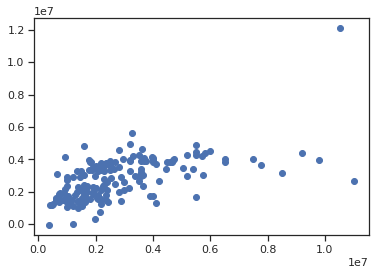

In [326]:
plt.scatter(y_test, predictions)

In [327]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1116123.2612005267
MSE: 2464445059615.306
RMSE: 1569855.1078412638


In [328]:
import pickle

# Dump the trained decision tree classifier with Pickle
model_filename = '/content/drive/MyDrive/DPDM65/Linear-Regressor.pkl'
# Open the file to save as pkl file
model_pkl = open(model_filename, 'wb')
pickle.dump(model, model_pkl)
# Close the pickle instances
model_pkl.close()

In [329]:
# Loading the saved decision tree model pickle
Regressor = open(model_filename, 'rb')
Regressor_model = pickle.load(Regressor)
print("Loaded Decision tree model :: ", Regressor_model)

Loaded Decision tree model ::  LinearRegression()


In [330]:
# prediction from Load model
pred = Regressor_model.predict(X_test)
print(len(pred))
print(pred)

174
[2121401.78707997 4685837.61269659 1497624.47011168 1469848.74689617
 2827336.47511454 4192887.61464697 4825303.57494342 2850484.88577829
 3879859.35529647 4025119.24683255 3791174.14348209  299627.22824301
 3709668.84827335 1467197.61325592 2859604.78550074 3661406.82188409
 3797439.83081175 1393416.95884466 3092287.03260987 3511342.00738507
 2848902.36292842 5033702.98609712 3980542.09669557 2848249.77618621
 3428111.67032834 1300303.4221953  4816401.09533346 3736758.84518234
 1470468.70430127 2125115.08889833 3436128.09254327 2707530.67507325
 2123299.69689825 3431082.31178302 2207527.83682217 2279985.18286477
 1479433.61467245 3706275.39721384 3888217.61527606 2882568.59840176
 3497847.21267659 4518151.87541399 3702270.14608349 3873422.96547798
 2067018.17158289 3882452.10569017 1477394.28110303 1827409.99135194
 1476007.53427582 1827575.02698831 4239965.63019126 4388363.32964208
 4178979.88238994 2848510.81088309 2268779.76014887 1607748.48286038
 2416026.49447349 4252791.9373

In [331]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 8.25178182e+01  3.26293371e+04  8.07143885e+04  9.79147474e+04
  9.79147474e+04  9.79147474e+04 -6.90778959e+05  6.90778959e+05
 -6.70553711e+05 -6.78169550e+05  5.93329425e+05  4.85974755e+05
 -1.07553570e+06  1.34495478e+06  2.38283701e+05 -3.38394596e+05
  1.00110895e+05]


In [332]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1124572.9519004882
MSE: 2519146687971.979
RMSE: 1587181.9958568013


In [333]:
X_test['sell_price'] = pred
X_test ##เป็นตาราง test ของอาจารย์

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ,sell_price
2548,33.0,0.00000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1,0,0,2.121402e+06
2011,489.0,1.02000,1.0,11.0,11.0,11.0,1,0,0,0,0,1,0,0,0,0,1,4.685838e+06
1810,0.0,1.10000,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,1.497624e+06
252,0.0,0.24875,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,1.469849e+06
824,70.7,0.04500,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,2.827336e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,96.0,0.05000,2.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,3.071411e+05
672,43.0,0.00000,2.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1.690310e+06
2549,0.0,0.00000,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,2.159283e+06
2577,0.0,0.06000,2.0,2.0,2.0,2.0,1,0,0,1,0,0,0,0,0,0,1,8.870341e+05


In [334]:
X_test['INDEX'] =  X_test.index+1

In [335]:
df_precict = X_test[['INDEX', 'sell_price']]
df_precict

,INDEX,sell_price
2548,2549,2.121402e+06
2011,2012,4.685838e+06
1810,1811,1.497624e+06
252,253,1.469849e+06
824,825,2.827336e+06
...,...,...
815,816,3.071411e+05
672,673,1.690310e+06
2549,2550,2.159283e+06
2577,2578,8.870341e+05


In [ ]:
df_precict.to_csv('/content/drive/MyDrive/DPDM65/predicted_y.csv')

#Final 13/11/2565

In [269]:
Finaldata = pd.read_csv('/content/drive/MyDrive/DPDM65/finaltest_X.csv')


In [270]:
Finaldata.head()

,INDEX,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,2925,21082.0,NaN,NaN,ขอนแก่น,บ้านไผ่,หินตั้ง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,2926,30237P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,NaN,บ้านเดี่ยว,NaN,NaN,...,NaN,18-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2927,18099.0,NaN,NaN,ขอนแก่น,บ้านไผ่,ในเมือง,อาคารพาณิชย์/สำนักงาน,no,no,...,2.0,1.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
3,2928,1713.0,NaN,NaN,ขอนแก่น,อุบลรัตน์,บ้านดง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
4,2929,3056P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,สำราญ,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN


In [336]:
Finaldata1 = Finaldata[['usable_area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]
Finaldata1

,usable_area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture
0,NaN,NaN,NaN,NaN,NaN,13.0,1.0,0.0,บ้านไผ่,ที่ดิน,ไม่ระบุ
1,NaN,5.0,40.0,NaN,18-22,0.0,0.0,190.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN
2,0.0,2.0,2.0,2.0,1.0,0.0,0.0,28.0,บ้านไผ่,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
3,NaN,NaN,NaN,NaN,NaN,13.0,3.0,52.0,อุบลรัตน์,ที่ดิน,ไม่ระบุ
4,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,เมืองขอนแก่น,ที่ดิน,NaN
...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,4.0,0.0,0.0,0.0,0.0,0.0,81.0,เมืองขอนแก่น,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
796,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN
797,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.5,เขาสวนกวาง,ที่ดิน,ไม่ระบุ
798,680.0,NaN,0.0,0.0,0.0,0.0,1.0,170.0,ชุมแพ,บ้านเดี่ยว,ไม่ระบุ


In [337]:
Finaldata1['number_of_rai'] = Finaldata1['number_of_rai'].replace(np.NaN, Finaldata1['number_of_rai'].mean())
Finaldata1['number_of_ngan'] = Finaldata1['number_of_ngan'].replace(np.NaN, Finaldata1['number_of_ngan'].mean())
Finaldata1['number_of_va'] = Finaldata1['number_of_va'].replace(np.NaN, Finaldata1['number_of_va'].mean())
print(set(Finaldata1['number_of_rai'].isnull()))
print(set(Finaldata1['number_of_ngan'].isnull()))
print(set(Finaldata1['number_of_va'].isnull()))

{False}
{False}
{False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [338]:
areatest = Finaldata1['number_of_rai']+(Finaldata1['number_of_ngan']/4)+(Finaldata1['number_of_va']/400)
areatest

0      13.25000
1       0.47500
2       0.07000
3      13.88000
4       1.00000
         ...   
795     0.20250
796     0.00000
797     0.75125
798     0.67500
799     0.05250
Length: 800, dtype: float64

In [339]:
Finaldata1['number_of_story']

0      NaN
1      5.0
2      2.0
3      NaN
4      NaN
      ... 
795    4.0
796    NaN
797    NaN
798    NaN
799    2.0
Name: number_of_story, Length: 800, dtype: object

In [341]:
Finaldata1['usable_area'] = pd.to_numeric(Finaldata1['usable_area'],errors='coerce')
Finaldata1['number_of_rai'] = pd.to_numeric(Finaldata1['number_of_rai'],errors='coerce')
Finaldata1['number_of_ngan'] = pd.to_numeric(Finaldata1['number_of_ngan'],errors='coerce')
Finaldata1['number_of_va'] = pd.to_numeric(Finaldata1['number_of_va'],errors='coerce')
Finaldata1['number_of_story'] = pd.to_numeric(Finaldata1['number_of_story'],errors='coerce')
Finaldata1['number_of_bedroom'] = pd.to_numeric(Finaldata1['number_of_bedroom'],errors='coerce')
Finaldata1['number_of_bathroom'] = pd.to_numeric(Finaldata1['number_of_bedroom'],errors='coerce')
Finaldata1['number_of_parking'] = pd.to_numeric(Finaldata1['number_of_bedroom'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [342]:
Finaldata1['number_of_story'] = Finaldata1['number_of_story'].replace(np.NaN, Finaldata1['number_of_story'].median())
Finaldata1['number_of_bedroom'] = Finaldata1['number_of_bedroom'].replace(np.NaN, Finaldata1['number_of_bedroom'].median())
Finaldata1['number_of_bathroom'] = Finaldata1['number_of_bathroom'].replace(np.NaN, Finaldata1['number_of_bathroom'].median())
Finaldata1['number_of_parking'] = Finaldata1['number_of_parking'].replace(np.NaN, Finaldata1['number_of_parking'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [344]:
Finaldata2 = pd.concat([Finaldata1, pd.Series(areatest,name='area')],axis='columns')
Finaldata2

,usable_area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture,area
0,NaN,2.0,1.0,1.0,1.0,13.0,1.0,0.0,บ้านไผ่,ที่ดิน,ไม่ระบุ,13.25000
1,NaN,5.0,40.0,40.0,40.0,0.0,0.0,190.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN,0.47500
2,0.0,2.0,2.0,2.0,2.0,0.0,0.0,28.0,บ้านไผ่,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ,0.07000
3,NaN,2.0,1.0,1.0,1.0,13.0,3.0,52.0,อุบลรัตน์,ที่ดิน,ไม่ระบุ,13.88000
4,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,เมืองขอนแก่น,ที่ดิน,NaN,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,4.0,0.0,0.0,0.0,0.0,0.0,81.0,เมืองขอนแก่น,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ,0.20250
796,NaN,2.0,2.0,2.0,2.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN,0.00000
797,NaN,2.0,1.0,1.0,1.0,0.0,3.0,0.5,เขาสวนกวาง,ที่ดิน,ไม่ระบุ,0.75125
798,680.0,2.0,0.0,0.0,0.0,0.0,1.0,170.0,ชุมแพ,บ้านเดี่ยว,ไม่ระบุ,0.67500


In [345]:
data_disttest = Finaldata2['district']
data_disttest[data_disttest!='เมืองขอนแก่น'] = 'ต่างอำเภอ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [346]:
set(data_disttest)

{'ต่างอำเภอ', 'เมืองขอนแก่น'}

In [347]:
Finaldata2['district'] = data_disttest

In [348]:
Finaldata2['district'] = Finaldata2['district'].replace(np.NaN, 'ไม่ระบุ')

In [352]:
data_furtest = Finaldata2['furniture']

In [353]:
data_furtest = data_furtest.fillna('ไม่ทราบ')

In [354]:
set(data_furtest)

{'ครบครัน',
 'ชั้นวางโทรทัศน์, ตู้เย็น, ตู้เสื้อผ้า, ที่นอน',
 'ตกแต่งครบ',
 'ตกแต่งครบ\n',
 'ตู้ เตียง โต๊ะอ่านหนังสือ ห้องแต่งตัว โต๊ะรับแขก ไมโครเวฟ ตู้เย็น เครื่องซักผ้า ผ้าม่านที่สั่งทำเอง เก้าอี้อ่านหนังสือ หมอนและหมอนข้างยังไม่แกะห่อ ระเบียงกว้าง',
 'ถังพักน้ำ ปั้มน้ำ เครื่องปรับอากาศ 4 ตัว เครื่องทำน้ำอุ่น 1 ตัว',
 'บางส่วน',
 'บาวส่วน',
 'ฟอร์นิเจอร์ built in ครบชุด',
 'มีบางส่วน',
 'มีเครื่องปรับอากาศ,ปั้มน้ำและถังพักน้ำ',
 'มีเครื่องปรับอากาศและฝักบัวน้ำอุ่น',
 'เครื่องซักผ้า +เครื่องปรับอากาศ 2 เครื่อง +เครื่องทำน้ำอุ่น 1 ตัว +ตู้เย็น 1 เครื่อง +ทีวี 1 เครื่อง +โซฟา 1 ตัว +เตียงพร้อมที่นอน 6 ฟุต +ตู้เสื้อผ้า +โต๊ะเครื่องแป้ง,สตู +เฟอร์นิเจอร์ built-in พร้อมที่เก็บของ +เตาไฟฟ้า พร้อมเครื่องดูดควัน +เตาไมโครเวฟ +อ่างล้างจานพร้อมก๊อกสแตนเลส',
 'เครื่องปรับอากาศ 1 เครื่อง ตู้เย็น 1 เครื่อง เครื่องดูดควัน เครื่องทำน้ำอุ่น โซฟา ทีวี+ชั้นวาง โต๊ะหนังสือ+ชั้นวางหนังสือ เตียง+ที่นอน+ตู้เสื้อผ้า โต๊ะเครื่องแป้ง ผ้าม่าน',
 'เครื่องปรับอากาศ 2 เครื่องและเฟอร์นิเจอร์บิวท์อิน\n',
 'เครื่

In [355]:
data_furtest[(data_furtest=='ไม่มี') | (data_furtest=='ไม่มีเฟอร์นิเจอร์') | (data_furtest=='ไม่มีเฟอร์นิเจอร์. เฟอร์นิเจอร์นำเข้าสามารถเจรจาแยกกันโดยผู้ซื้อ') | (data_furtest=='ไม่รวมตู้เย็น,ทีวี,เครื่องซักผ้า') | (data_furtest=='ไม่รวมเฟอร์นิเจอร์')] = 'ไม่มีเฟอร์นิเจอร์'

In [356]:
data_furtest[(data_furtest!='ไม่ระบุ') & (data_furtest!='ไม่มีเฟอร์นิเจอร์')] = 'มีเฟอร์นิเจอร์'

In [357]:
set(data_furtest)

{'มีเฟอร์นิเจอร์', 'ไม่มีเฟอร์นิเจอร์', 'ไม่ระบุ'}

In [359]:
set(data_furtest.isnull())

{False}

In [360]:
Finaldata2['furniture'] = data_furtest

In [363]:
Finaldata3 = Finaldata2[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]
Finaldata3

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture
0,NaN,13.25000,2.0,1.0,1.0,1.0,13.0,1.0,0.0,ต่างอำเภอ,ที่ดิน,ไม่ระบุ
1,NaN,0.47500,5.0,40.0,40.0,40.0,0.0,0.0,190.0,เมืองขอนแก่น,บ้านเดี่ยว,มีเฟอร์นิเจอร์
2,0.0,0.07000,2.0,2.0,2.0,2.0,0.0,0.0,28.0,ต่างอำเภอ,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
3,NaN,13.88000,2.0,1.0,1.0,1.0,13.0,3.0,52.0,ต่างอำเภอ,ที่ดิน,ไม่ระบุ
4,NaN,1.00000,2.0,1.0,1.0,1.0,1.0,0.0,0.0,เมืองขอนแก่น,ที่ดิน,มีเฟอร์นิเจอร์
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.20250,4.0,0.0,0.0,0.0,0.0,0.0,81.0,เมืองขอนแก่น,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
796,NaN,0.00000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว,มีเฟอร์นิเจอร์
797,NaN,0.75125,2.0,1.0,1.0,1.0,0.0,3.0,0.5,ต่างอำเภอ,ที่ดิน,ไม่ระบุ
798,680.0,0.67500,2.0,0.0,0.0,0.0,0.0,1.0,170.0,ต่างอำเภอ,บ้านเดี่ยว,ไม่ระบุ


In [369]:
print(set(Finaldata3['usable_area'].isnull()))
print(set(Finaldata3['number_of_rai'].isnull()))
print(set(Finaldata3['number_of_ngan'].isnull()))
print(set(Finaldata3['number_of_va'].isnull()))
print(set(Finaldata3['number_of_story'].isnull()))
print(set(Finaldata3['number_of_bedroom'].isnull()))
print(set(Finaldata3['number_of_bathroom'].isnull()))
print(set(Finaldata3['district'].isnull()))
print(set(Finaldata3['property_type'].isnull()))
print(set(Finaldata3['furniture'].isnull()))

{False, True}
{False}
{False}
{False}
{False}
{False}
{False}
{False}
{False}
{False}


In [370]:
Finaldata4 = pd.get_dummies(Finaldata3)
Finaldata4 

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,NaN,13.25000,2.0,1.0,1.0,1.0,13.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,1
1,NaN,0.47500,5.0,40.0,40.0,40.0,0.0,0.0,190.0,0,1,0,0,0,1,0,0,1,0,0
2,0.0,0.07000,2.0,2.0,2.0,2.0,0.0,0.0,28.0,1,0,0,0,0,0,0,1,0,0,1
3,NaN,13.88000,2.0,1.0,1.0,1.0,13.0,3.0,52.0,1,0,0,0,1,0,0,0,0,0,1
4,NaN,1.00000,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.20250,4.0,0.0,0.0,0.0,0.0,0.0,81.0,0,1,0,0,0,0,0,1,0,0,1
796,NaN,0.00000,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0
797,NaN,0.75125,2.0,1.0,1.0,1.0,0.0,3.0,0.5,1,0,0,0,1,0,0,0,0,0,1
798,680.0,0.67500,2.0,0.0,0.0,0.0,0.0,1.0,170.0,1,0,0,0,0,1,0,0,0,0,1


In [371]:
Finaldata5  = Finaldata4 .dropna()
Finaldata5

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
2,0.0,0.07000,2.0,2.0,2.0,2.0,0.0,0.0,28.0,1,0,0,0,0,0,0,1,0,0,1
7,32.0,0.00000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1
8,172.0,0.05250,3.0,3.0,3.0,3.0,0.0,0.0,21.0,0,1,0,1,0,0,0,0,1,0,0
10,30.0,0.00000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
13,160.0,0.15000,2.0,3.0,3.0,3.0,0.0,0.0,60.0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.0,0.05000,2.0,0.0,0.0,0.0,0.0,0.0,20.0,0,1,0,0,0,0,0,1,0,0,1
794,0.0,0.14375,2.0,3.0,3.0,3.0,0.0,0.0,57.5,0,1,0,0,0,1,0,0,1,0,0
795,0.0,0.20250,4.0,0.0,0.0,0.0,0.0,0.0,81.0,0,1,0,0,0,0,0,1,0,0,1
798,680.0,0.67500,2.0,0.0,0.0,0.0,0.0,1.0,170.0,1,0,0,0,0,1,0,0,0,0,1


In [377]:
Finaldata6 = Finaldata5[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking',	'district_ต่างอำเภอ',	'district_เมืองขอนแก่น',	'property_type_คอนโด',	'property_type_ทาวน์โฮม',	'property_type_ที่ดิน',	'property_type_บ้านเดี่ยว','property_type_บ้านแฝด','property_type_อาคารพาณิชย์/สำนักงาน','furniture_มีเฟอร์นิเจอร์','furniture_ไม่มีเฟอร์นิเจอร์','furniture_ไม่ระบุ']]
Finaldata6

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
2,0.0,0.07000,2.0,2.0,2.0,2.0,1,0,0,0,0,0,0,1,0,0,1
7,32.0,0.00000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,0,0,1
8,172.0,0.05250,3.0,3.0,3.0,3.0,0,1,0,1,0,0,0,0,1,0,0
10,30.0,0.00000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1,0,0
13,160.0,0.15000,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.0,0.05000,2.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1
794,0.0,0.14375,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
795,0.0,0.20250,4.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1
798,680.0,0.67500,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
predictions = cross_val_predict(model, Finaldata6, y_final, cv=10)  
print(len(predictions))
predictions

In [ ]:
pred = Regressor_model.predict(Finaldata6)
print(len(pred))
print(pred)

In [ ]:
Finaldata6['sell_price'] = pred
Finaldata6

In [ ]:
Finaldata6['INDEX'] =  X_test.index+1

In [ ]:
df_precict = Finaldata6[['INDEX', 'sell_price']]
df_precict

In [ ]:
df_precict.to_csv('/content/drive/MyDrive/DPDM65/predicted_y.csv')